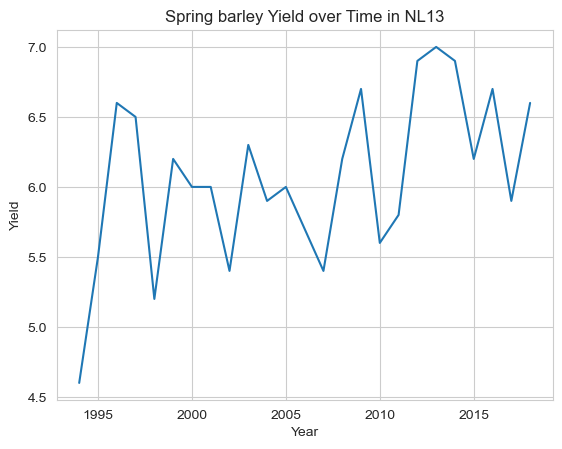


Starting KESSLER------------------

Initial Params: [0.01 0.1  0.2 ]
Initial Likelihood: -550.5639721915595
`xtol` termination condition is satisfied.
Number of iterations: 26, function evaluations: 40, CG iterations: 36, optimality: 8.79e+00, constraint violation: 0.00e+00, execution time: 0.045 s.
Final Params: [0.09563849 0.36790723 0.83154989]
Final Likelihood: -35.12273812500694

Kessler MLE: 
params      | [0.09563849 0.36790723 0.83154989] 
sample size | 24 
likelihood  | -35.12273812500694 
AIC         | 76.24547625001388
BIC         | 79.77963774105771 


Starting SHOJI-OZAKI------------------

Initial Params: [0.01 0.1  0.2 ]
Initial Likelihood: -551.947921390756
`xtol` termination condition is satisfied.
Number of iterations: 39, function evaluations: 140, CG iterations: 87, optimality: 1.33e+00, constraint violation: 0.00e+00, execution time: 0.073 s.
Final Params: [0.385503   0.48240393 1.4468226 ]
Final Likelihood: -26.127476682291586

Shoji-Ozaki MLE: 
params      | [0.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pymle.models.CIR import CIR
from pymle.core.TransitionDensity import KesslerDensity, ShojiOzakiDensity
from pymle.fit.AnalyticalMLE import AnalyticalMLE
import seaborn as sns
import matplotlib.dates as mdates
import datetime

sns.set_style('whitegrid')

# ===========================
# Load and prepare the data (Crop yield time series)
# ===========================
file_path = '../datasets/CropSDEData/YIELD_NUTS2_NL_transposed.csv' 
data = pd.read_csv(file_path)

# Filter the dataset for a specific crop and region (e.g., "Spring barley" and "NL13")
crop_name = 'Spring barley'
region_code = 'NL13'
filtered_data = data[(data['CROP'] == crop_name) & (data['IDREGION'] == region_code)]

# Extract years and yield data
years = filtered_data['year'].values
yield_data = filtered_data['yield'].values

# Skip some data points for better spacing in SDE modeling
skip = 1  # Adjust if necessary
dt = skip / (max(years) - min(years))  # Normalize time interval over the years
sample = yield_data[::skip]  # Sampled yield data

# ===========================
# Create the Hypothesized model (CIR)
# ===========================
model = CIR()
param_bounds = [(0.0, 10), (0.0, 10), (0.01, 3)]  # Parameter bounds for the CIR model
guess = np.array([0.01, 0.1, 0.2])  # Initial guess for the parameters

# =====================
# Plot the data
# =====================
do_plot = True
if do_plot:
    fig, ax = plt.subplots()

    ax.plot(years, yield_data)
    plt.xlabel('Year')
    plt.ylabel('Yield')
    plt.title(f'{crop_name} Yield over Time in {region_code}')
    plt.grid(True)
    plt.show()

# ===========================
# Fit Maximum Likelihood Estimators (MLE)
# ===========================

# Fit using Kessler MLE
print("\nStarting KESSLER------------------\n")
kessler_est = AnalyticalMLE(sample=sample, param_bounds=param_bounds, dt=dt,
                            density=KesslerDensity(model)).estimate_params(guess)
print(f'\nKessler MLE: {kessler_est} \n')

# Fit using Shoji-Ozaki MLE
print("\nStarting SHOJI-OZAKI------------------\n")
shojioz_est = AnalyticalMLE(sample=sample, param_bounds=param_bounds, dt=dt,
                            density=ShojiOzakiDensity(model)).estimate_params(guess)
print(f'\nShoji-Ozaki MLE: {shojioz_est}')


Based on the results, Shoji-Ozaki MLE appears to fit the data better than Kessler MLE, as indicated by the higher likelihood and lower AIC/BIC values.
The Shoji-Ozaki model estimates higher volatility, which may be more appropriate for capturing large fluctuations in crop yields.
Depending on the level of complexity and volatility you're interested in modeling, the Shoji-Ozaki approach may be more suitable for the data.